# Classifier for Patient Drug Presciption  using Decison Tree
## Written by Abiola Obembe
### Date : 15th March 2020

In [1]:
# install libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
!pip install pydotplus
!pip install graphviz
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
%matplotlib inline
print('Libraries installed!')

Libraries installed!


In [2]:
# Download dataset and display first 10 rows

!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
    
df = pd.read_csv("drug200.csv", delimiter =",")
#df.to_csv

df.head(10)

--2020-03-15 06:14:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

100%[======================================>] 6,027       --.-K/s   in 0s      

2020-03-15 06:14:58 (571 MB/s) - ‘drug200.csv’ saved [6027/6027]



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
# print shape of original dataframe
print('The size of the dataframe is :', df.shape)

The size of the dataframe is : (200, 6)


In [4]:
# Check for missing values and reomve from dataframe
df.dropna( axis=0, how='any')
print('The size of the new dataframe is :', df.shape)

The size of the new dataframe is : (200, 6)


In [5]:
# display column names of dataframe and datatypes
print(df.columns)
df.dtypes

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
# display categories of target field
print(df['Drug'].unique())

print(df['Drug'].value_counts())

['drugY' 'drugC' 'drugX' 'drugA' 'drugB']
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [7]:
# Statistical summary of dataframe
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### The above shows that only columns "Age" and "Na_to_K" are quantitaive fields and the other fields are qualitative and would required onehot encoding or dummy variables method

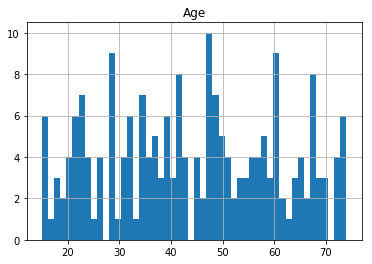

In [8]:
# Visual data exploration

# Explore Age distribution
df.hist(column = 'Age', bins = 50)
plt.show()

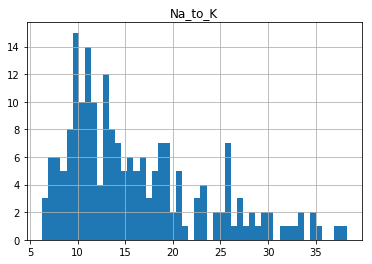

In [9]:
# Visual data exploration

# Explore Na_to_K distribution
df.hist(column = 'Na_to_K', bins = 50)
plt.show()

In [10]:
# Select features X
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [11]:
# Sklearn Decison tree does not work with qualitative variables hence we convert them using LableEncoder

from sklearn.preprocessing import LabelEncoder

# Sex column
le_sex = LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])
#X[:, 1] = le_sex.fit_transform(X[:, 1])

# BP column
le_BP = LabelEncoder()
#le_BP.fit(['LOW','NORMAL', 'HIGH'])
#X[:,2] = le_sex.transform(X[:,2])
X[:, 2] = le_BP.fit_transform(X[:, 2])

# Cholesterol column
le_ch = LabelEncoder()
#le_ch.fit(['NORMAL','HIGH'])
#X[:,3] = le_sex.transform(X[:,3])
X[:, 3] = le_ch.fit_transform(X[:, 3])

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [12]:
# Label target variable

y = df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [13]:
# Split dataset to train_test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 4)

print("Train set size:", X_train.shape , y_train.shape)
print("Test set size:", X_test.shape , y_test.shape)

Train set size: (160, 5) (160,)
Test set size: (40, 5) (40,)


In [14]:
# Modeling
DrugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
DrugTree.fit(X_train,y_train)

# prediction
predTree = DrugTree.predict(X_test)

print('First 5 rows of prediction:', predTree[0:5])
print('First 5 rows of true:', y_test[0:5])

First 5 rows of prediction: ['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
First 5 rows of true: ['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


In [15]:
# Accuracy of Decison Tree classifier
from sklearn.metrics import accuracy_score
print("The accuracy of the Decison tree is %.3f" , accuracy_score(y_test,predTree))


The accuracy of the Decison tree is %.3f 0.95


In [16]:
from sklearn.metrics import f1_score
print('The f1 score for the Decison tree is:' ,f1_score(y_test, predTree, average='weighted'))

The f1 score for the Decison tree is: 0.948269526172752


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predTree, labels=df['Drug'].unique().tolist()))
             

              precision    recall  f1-score   support

       drugY       0.94      1.00      0.97        15
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.91      0.95        11
       drugA       0.86      1.00      0.92         6
       drugB       1.00      0.67      0.80         3

   micro avg       0.95      0.95      0.95        40
   macro avg       0.96      0.92      0.93        40
weighted avg       0.96      0.95      0.95        40



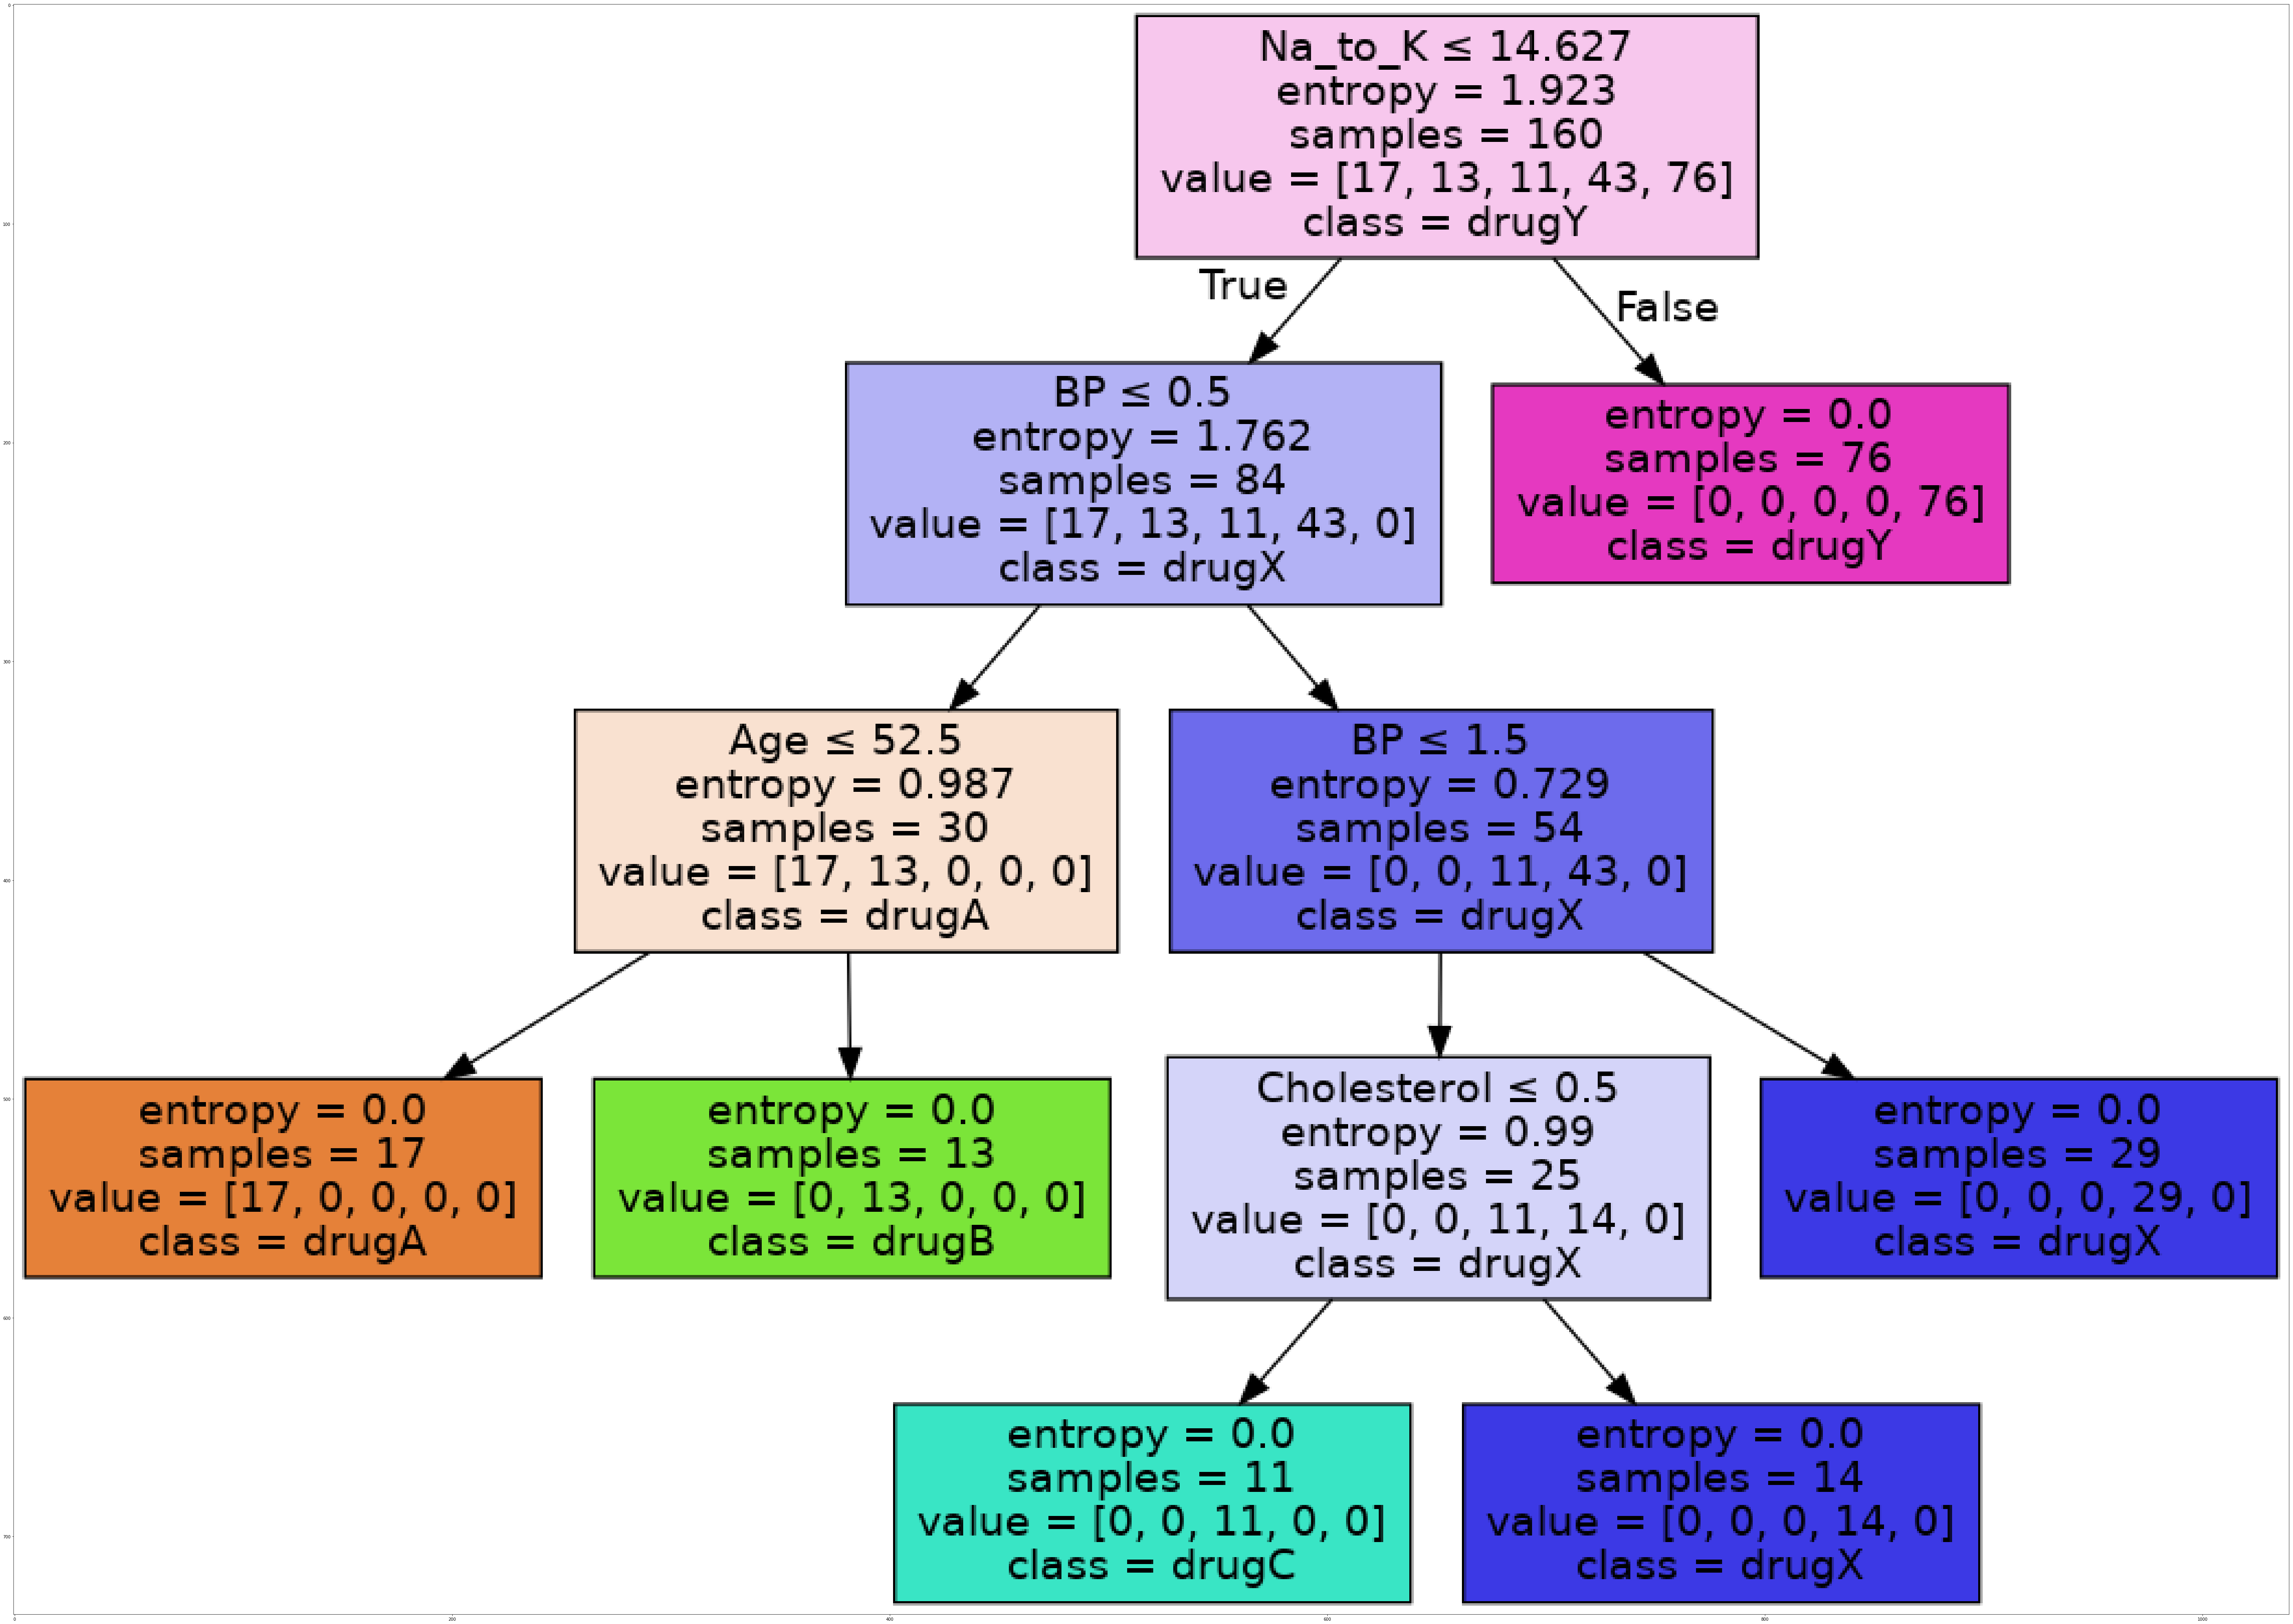

In [18]:
# Plot tree
from sklearn import tree
dot_data = StringIO()
filename = "DrugTree.png"
featureNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()
out = tree.export_graphviz(DrugTree, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize =(100,200))
plt.imshow(img, interpolation ='nearest')